In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset 
students = pd.read_csv("../Datasets/students.csv")

In [5]:
# Import Sklearn 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score , f1_score , recall_score , classification_report

In [6]:
# Import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [7]:
# Initialize model 
models = {
    "Linear Classification" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest" :RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "X G B" : XGBClassifier()
}

In [10]:
# Split Features and Labels dataset 
feature = students.drop("FinalGrade" , axis = 1 )
label = students["FinalGrade"]

In [11]:
# Split data into training and testing dataset 
X_train , X_test , y_train , y_test = train_test_split(feature , label , test_size=0.2 , random_state=42)

In [12]:
# Pipeline for Standardization and normalization 
standardizer = ColumnTransformer(
    transformers = [
        ("Standard" , StandardScaler() , X_train.columns)
    ]
)
normalizer = ColumnTransformer(
    transformers = [
        ("Standard" , MinMaxScaler() , X_train.columns)
    ]
)


In [15]:
# For Storing results
results = {}

Accuracy of Linear Classification -> 0.9931836407377707
F1 Score of Linear Classification -> 0.9931811832925377
Recall Score Linear Classification -> 0.9931836407377707
Classification Report


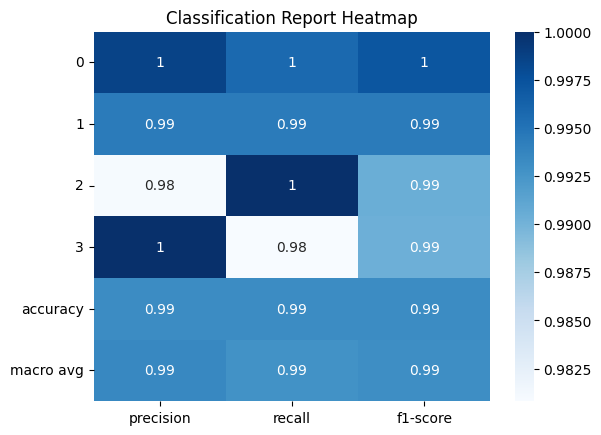

Accuracy of Decision Tree -> 1.0
F1 Score of Decision Tree -> 1.0
Recall Score Decision Tree -> 1.0
Classification Report


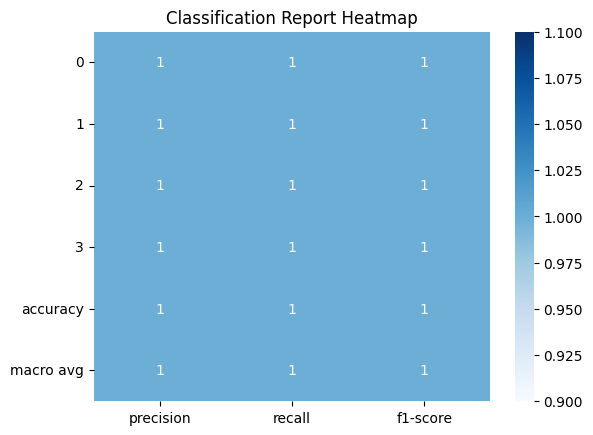

Accuracy of Random Forest -> 1.0
F1 Score of Random Forest -> 1.0
Recall Score Random Forest -> 1.0
Classification Report


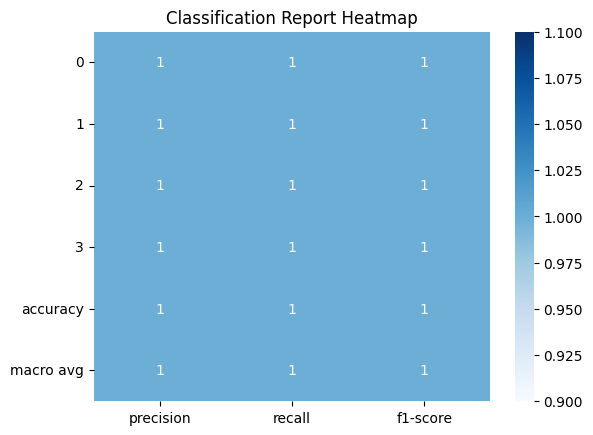

Accuracy of Support Vector Machine -> 0.9611066559743384
F1 Score of Support Vector Machine -> 0.9611222510121762
Recall Score Support Vector Machine -> 0.9611066559743384
Classification Report


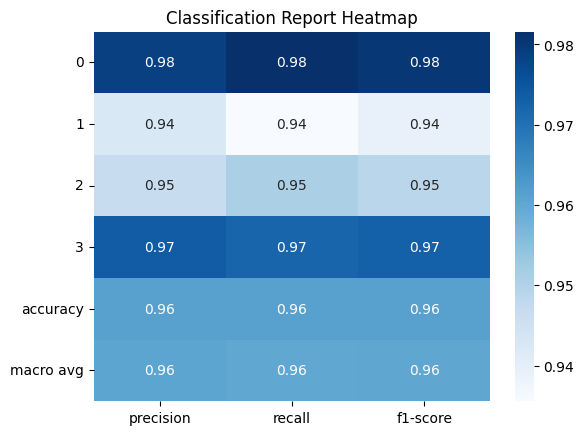

Accuracy of X G B -> 1.0
F1 Score of X G B -> 1.0
Recall Score X G B -> 1.0
Classification Report


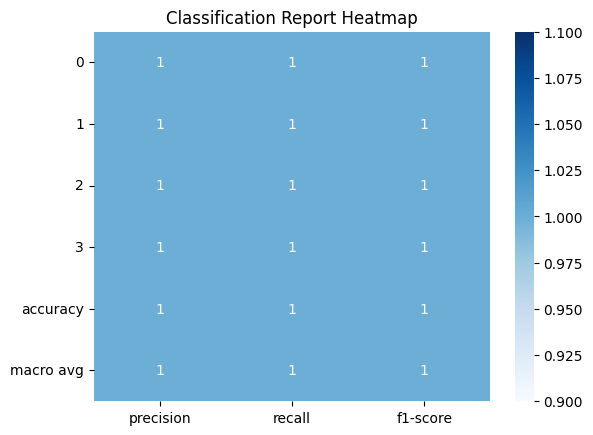

In [18]:
# Create Pipeline 
for name , model in models.items():
    pipeline_model = Pipeline(
        steps = [
            ("Pre Processor " , standardizer),
            ("Model Name" , model)
        ]
    )
    pipeline_model.fit(X_train , y_train)
    y_pred = pipeline_model.predict(X_test)
    accuracy = accuracy_score(y_pred , y_test)
    print(f"Accuracy of {name} -> {accuracy}")
    print(f"F1 Score of {name} -> {f1_score(y_pred , y_test ,  average='weighted')}")
    print(f"Recall Score {name} -> {recall_score(y_pred , y_test, average='weighted')}")
    print("Classification Report")
    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues")
    plt.title("Classification Report Heatmap")
    plt.show()


In [19]:
# Best Model Pipeline 
best_model = Pipeline(
    steps = [ 
        ("PreProcessor"  , normalizer),
        ("Model" , DecisionTreeClassifier())
    ]
)
best_model.fit(X_train , y_train)

,steps,"[('PreProcessor', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Standard', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
y_pred = best_model.predict(X_test) 
print(accuracy_score(y_pred, y_test))

1.0


In [22]:
# Save the model 
import pickle

# Suppose 'model' is your trained model
# Save to file
with open("C:\\Users\\BEST LAPTOP\\Desktop\\ML_Projects\\Student Alert End to End Project\\SaveModel\\model.pkl", "wb") as f:
    pickle.dump(model, f)